# Wrangle and Analyze twitter data
## WeRateDogs 
### by Apurva Verma

## Introduction
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking these aforementioned laws.
The account's language has spawned an Internet language about "doggos" and "puppers". A 2016 interaction with another Twitter user, when Nelson purposefully misnamed him "Brent" as is common in Weird Twitter, spawned the catchphrase "They're good dogs, Brent", which became one of the biggest memes of 2016.
In this project I'll analyze the dataframes to communicate useful findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import requests
import json
import os

## Gathering
**Twitter archive file**: download this file manually by clicking the following link: twitter_archive_enhanced.csv

**The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**Twitter API & JSON**: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

#### Twitter archive file

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### The tweet image predictions

In [9]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [10]:
#to check for downloaded file
#response.content

In [11]:
#To save this file to our computer
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)
    

In [12]:
# Load the images file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [13]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Twitter API & JSON

In [10]:
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify =True)
                 

In [11]:
#Download Tweepy status object based on Tweet ID and store in list
tweets_list = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets= []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 181
Rate limit reached. Sleeping for: 193


In [12]:
print("The lengh of the result", len(tweets_list))
print("The lengh of the errors", len(cant_find_tweets))

The lengh of the result 2332
The lengh of the errors 24


In [13]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_list, file)

In [14]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweets_list
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]

In [15]:
twitter2.head()

,tweet_id,favorite_count,retweet_count
0,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...,36050,7673
1,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...,31088,5674
2,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...,23395,3762
3,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...,39303,7840
4,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...,37532,8445


# Access data

## twitter_archive 

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [18]:
twitter_archive.duplicated().sum()

0

In [19]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Tebow        1
Jerome       1
Margo        1
Peanut       1
Karl         1
Name: name, Length: 957, dtype: int64

In [20]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## images

In [23]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
# show image for tweet_id 666020888022790149
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [25]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## twitter2

In [26]:
twitter2.head()

,tweet_id,favorite_count,retweet_count
0,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...,36050,7673
1,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...,31088,5674
2,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...,23395,3762
3,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...,39303,7840
4,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...,37532,8445


In [27]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2332 non-null   object
 1   favorite_count  2332 non-null   int64 
 2   retweet_count   2332 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


## Quality Issues

### For Twitter archived dataframe:
1. Tweet_id is an integer, it should be str.
2. timestamp should be in datetime not object.
3.  drop columns that are not useful as 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'.
4. To categorized sources in readable format
5. Name column have invalid names i.e 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'.


### For tweet image predictions :
1. To correct the p1,p2 and p3 columns for consistency 
2. To delete duplicated image url
3. tweet_id is an integer. should be str
4. There are 2356 tweets in the twitter1 dataframe and 2075 rows in the images dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.


### for Twitter API & JSON dataframe:
1. tweet_id is an integer
2. There are 24 missing tweets compared to the twitter_archive dataframe

### Tidiness Issues
**twitter_archive dataframe**
1. one column for 'doggo', 'floofer', 'pupper', 'puppo'. 
2. to create a column for dogs rating.
3. to create a column for dogs gender.  
**images dataframe**
1. to create a new column 'breed' with p1_dog,p2_dog and p3_dog.The columns for dog breed predictions can be condensed.
2. To create a new column for confidence interval  
**twitter dataframe**
1. 24 twitter_id informations are missing

**Combine twitter_archive dataframe, images dataframe and twitter dataframe to one dataframe**


# Cleaning

#### Create a copy of original dataframe for cleaning purpose.

In [28]:
df_archive=twitter_archive.copy()
df_images=images.copy()
df_twitter=twitter2.copy()

In [29]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue 1
#### Define- To convert timestamp from object to datetime and tweet_id from int to str

#### Code

In [30]:
# Change timestamp to a datetime
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])
# Change 'tweet_id' to a string
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)

#### Test

In [31]:
df_archive.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue 2
#### Define-  We need to drop columns that are not useful for analysis as 'retweeted_status_id',                 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'.

#### Code

In [32]:
df_archive.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis= 1 , inplace= True)

#### Test

In [33]:
df_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue 3
#### Define- To categorized sources in readable format

#### Code

In [34]:
df_archive['source'] = df_archive['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];
df_archive['source'] = df_archive['source'].astype('category')

#### Test

In [35]:
df_archive['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue 5
#### Define-create new colum dog_stages for doggo, floofer, pupper and puppo

#### Code

In [36]:
# create new colum dog_stages
df_archive['dog_stages'] = df_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_archive['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) 
df_archive['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_archive['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_archive['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)
df_archive['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [37]:
df_archive.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

In [38]:
df_archive['dog_stages'].value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stages, dtype: int64

#### Test

In [39]:
df_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2048,671511350426865664,2015-12-01 02:09:16+00:00,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8,10,Hammond,None
1975,672997845381865473,2015-12-05 04:36:04+00:00,Twitter for iPhone,Say hello to Kenzie. She is a fluff ball. 12/1...,https://twitter.com/dog_rates/status/672997845...,12,10,Kenzie,None
1528,690348396616552449,2016-01-22 01:40:58+00:00,Vine - Make a Scene,This is Oddie. He's trying to communicate. 12/...,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None
76,878057613040115712,2017-06-23 01:10:23+00:00,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None
2320,666437273139982337,2015-11-17 02:06:42+00:00,Twitter for iPhone,Here we see a lone northeastern Cumberbatch. H...,https://twitter.com/dog_rates/status/666437273...,7,10,None,None


### Issue 6
#### Defne- Name column have invalid names i.e 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'.

#### Code

In [40]:
# Find all names starting with a lowercase 
names = []
for row in df_archive['name']:
    if row[0].islower() and row not in names:
        names.append(row)
print(names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [42]:
# Replace all names that start with a lowercase letter with a NaN, the name 'O' with "O'Malley" and all 'None's with a NaN
df_archive['name'].replace(names, np.nan,inplace = True)
df_archive['name'].replace('O',  "O'Malley",inplace = True)
df_archive['name'].replace('None', np.nan,inplace = True)

#### Test

In [43]:
# Check value counts
df_archive['name'].value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Lola       10
           ..
Tebow       1
Jerome      1
Margo       1
Peanut      1
Karl        1
Name: name, Length: 931, dtype: int64

### Issue 7
#### Define- To create a column for dog's rating

#### Code

In [44]:
df_archive['dog_rating'] = df_archive.rating_numerator / df_archive.rating_denominator

#### Test

In [45]:
df_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2


### Issue 8
#### Define- To create a new column for gender

#### Code

In [46]:
# Loop on all the texts append the result in a list
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]
gender = []
for text in df_archive['text']:
    if any(map(lambda v:v in male, text.split())):
        gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        gender.append('female')
    else:
        gender.append('NaN')
        
len(gender)
df_archive['gender'] = gender

In [47]:
print("gender count \n", df_archive.gender.value_counts())

gender count 
 NaN       1381
male       716
female     259
Name: gender, dtype: int64


#### Test

In [48]:
df_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_rating,gender
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,female
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,male
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,female
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2,male


# images

### Issue 9
#### Define- To correct the p1,p2 and p3 columns for consistency

#### Code

In [49]:
# To lower case and fill the spaces '_' with ' '
df_images['p1'] = images['p1'].str.lower().replace('_', ' ')
df_images['p2'] = images['p2'].str.lower().replace('_', ' ')
df_images['p3'] = images['p3'].str.lower().replace('_', ' ')

#### Test

In [50]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [51]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue 10
#### Define- To delete duplicated image url

#### Code

In [52]:
df_images['jpg_url'].duplicated().sum()

66

In [53]:
#delete duplicated jpg_url
df_images= df_images.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [54]:
df_images['jpg_url'].duplicated().sum()

0

### Issue 11
#### Define- to create a new column 'breed' with p1_dog,p2_dog and p3_dog.

#### Code

In [55]:
# breed prediction from the images
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [56]:
# create a new column 'breed'
df_images['breed'] = df_images.apply (lambda row: breed (row),axis=1)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [57]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher


### Issue 12
#### Define- To create a new column for confidence interval

#### Code

In [58]:
# confidence for breed prediction images
def confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [59]:
# new column 'confidence'
df_images['confidence'] = df_images.apply (lambda row: confidence(row),axis=1)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [60]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311


### Issue 13
#### Define- To create a combined dataframe of df_archive, df_images and df_twitter.

#### Code

In [61]:
df_images['tweet_id'] = df_images['tweet_id'].astype(str)
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
#that merge df_archive and df_image
twitter = pd.merge(df_archive, df_images,  how = 'left', on = ['tweet_id'])
twitter = twitter[twitter['jpg_url'].notnull()]


In [64]:
#dataframe that merge twitter and df_twitter
twitter_cleaned = pd.merge(twitter, df_twitter, how = 'left', on = ['tweet_id'])

#### Test

In [66]:
twitter_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2009 non-null   object             
 1   timestamp           2009 non-null   datetime64[ns, UTC]
 2   source              2009 non-null   category           
 3   text                2009 non-null   object             
 4   expanded_urls       2009 non-null   object             
 5   rating_numerator    2009 non-null   int64              
 6   rating_denominator  2009 non-null   int64              
 7   name                1350 non-null   object             
 8   dog_stages          2009 non-null   object             
 9   dog_rating          2009 non-null   float64            
 10  gender              2009 non-null   object             
 11  jpg_url             2009 non-null   object             
 12  img_num             2009 non-null 

In [67]:
twitter_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_rating,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3,...,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,...,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,0.716012,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,...,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever,0.168086,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,0.555712,NaN,NaN


#### Save the twitter_cleaned dataframe to twitter_archive_master.csv

In [68]:
twitter_cleaned.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Visualizing

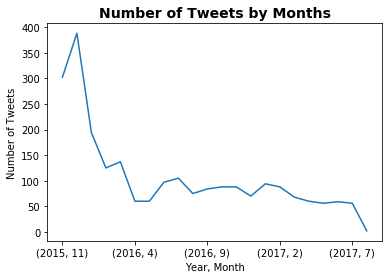

In [69]:
figsize = (15,6)
data_ = df_archive['tweet_id'].groupby([df_archive['timestamp'].dt.year, df_archive['timestamp'].dt.month]).count()
data_.plot(kind='line');
plt.title('Number of Tweets by Months', size=14,fontweight='bold');
plt.xlabel('Year, Month');
plt.ylabel('Number of Tweets');


**Most of the tweets were posted on end of the year 2015(around Nov-Dec) that is nearly 400. In the year 2016 the number of tweets rapidly decreased till April and then remained consistent till July 2017.**

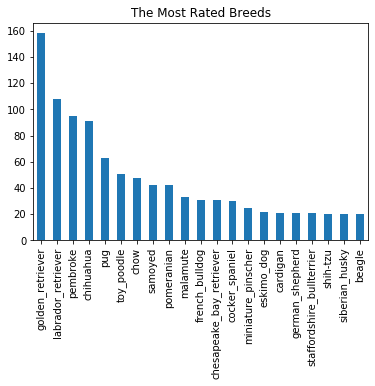

In [70]:
#most rated breed
data1=df_images.groupby('breed').filter(lambda x: len(x) >= 20)
data1['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');
plt.xticks(rotation=90);

**Clearly, GOLDEN RETRIVER is the most rated breed.**

In [71]:
import seaborn

C:\Users\hp\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


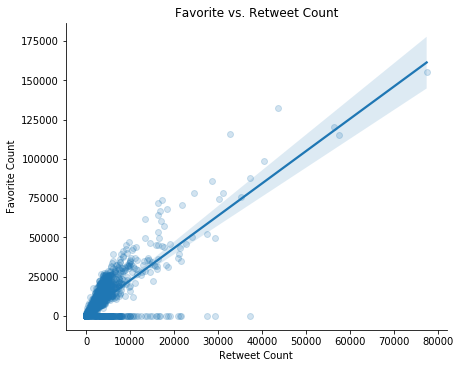

In [72]:
# retweet vs favorite count
seaborn.lmplot(x="retweet_count",  y="favorite_count",  data=df_twitter, size = 5, aspect=1.3,scatter_kws={'alpha':1/5});
plt.title('Favorite vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
##bove seems like a strog relationship but abviously if tweet get liked then thats the one get retweeted thousands of time.

**Favorite and retweet counts are highly positively correlated. Every 4 favorites has 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.**

In [73]:
df_integer_ratings_14 = df_archive[(df_archive.rating_numerator <= 14)]
subset_rating_count = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

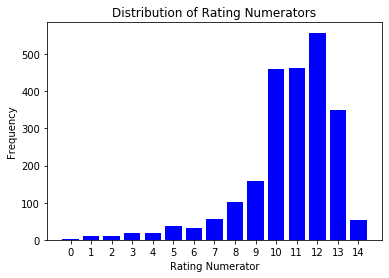

In [74]:
plt.bar(np.arange(15), subset_rating_count, color="blue")
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

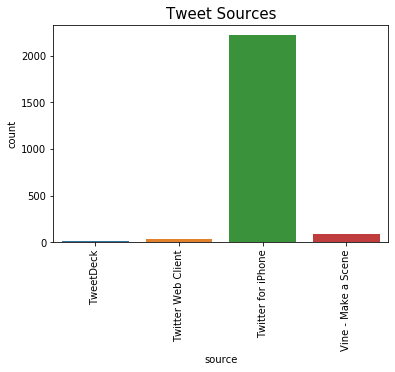

In [76]:
figsize = (10,4)
seaborn.countplot(data=df_archive, x='source')
plt.title('Tweet Sources', size=15)
plt.xticks(rotation=90);

**The most popular source is Twitter for IPhone with above 2000 counts, while the least popular is TweetDeck.**

### REFERENCES:

1. Stackoverflow 

https://stackoverflow.com/questions/17049821/setting-up-twitter-api-getting-the-last-few-tweets
https://stackoverflow.com/questions/20199126/reading-json-from-a-file
https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
https://stackoverflow.com/questions/44282210/passing-column-values-into-lambda-function-in-pandas
2. Pandas.pydata.org 

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
https://pandas.pydata.org/pandas-docs/version/0.23.1/missing_data.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html
3. towardsdatascience.com 

https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
